In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Datasets/weather_new_df1.csv')
df2 = pd.read_csv('Datasets/weather_new_df2.csv')
df3 = pd.read_csv('Datasets/weather_new_df3.csv')
df4 = pd.read_csv('Datasets/weather_new_df4.csv')

In [3]:
data = pd.concat([df1, df2, df3, df4],ignore_index=True)

In [4]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
temp = data.loc[(data['longitude'] == 143.9641) &
              (data['latitude'] == -20.1803)]

In [10]:
data['date'] = pd.to_datetime(data['date'])

data['date'] = data['date'] + pd.Timedelta(hours=10)

temp

In [2]:
data = pd.read_csv('Datasets/weather_date_corrected.csv')

In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data

,date,latitude,longitude,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2022-01-01 00:00:00+00:00,-20.1803,143.9641,24.927502,53.812250,14.9275,24.351501,0.0,0.0,0.0,...,60.340992,27.359999,26.277500,29.877500,30.227500,27.077501,0.092,0.080,0.053,0.066
1,2022-01-01 01:00:00+00:00,-20.1803,143.9641,23.877500,60.904724,15.8775,23.713776,0.0,0.0,0.0,...,55.922764,25.560000,25.627500,29.727500,30.177502,27.077501,0.091,0.080,0.053,0.066
2,2022-01-01 02:00:00+00:00,-20.1803,143.9641,23.377500,64.389410,16.2775,23.470617,0.0,0.0,0.0,...,49.014275,25.199999,25.127500,29.527500,30.177502,27.077501,0.091,0.080,0.053,0.066
3,2022-01-01 03:00:00+00:00,-20.1803,143.9641,22.877500,66.154686,16.2275,22.960554,0.0,0.0,0.0,...,39.805527,24.119999,24.627500,29.327501,30.177502,27.077501,0.091,0.080,0.053,0.066
4,2022-01-01 04:00:00+00:00,-20.1803,143.9641,22.427502,67.986000,16.2275,22.466736,0.0,0.0,0.0,...,28.495539,24.480000,24.177502,29.127500,30.177502,27.077501,0.091,0.080,0.053,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576851,2024-01-21 19:00:00+00:00,-23.0698,144.1217,34.932503,35.622967,17.4825,36.706880,0.0,0.0,0.0,...,94.398620,21.599998,36.532500,32.782500,31.782500,29.332499,0.207,0.299,0.270,0.284
2576852,2024-01-21 20:00:00+00:00,-23.0698,144.1217,32.082500,47.071610,19.3825,34.552776,0.0,0.0,0.0,...,47.489597,9.720000,34.782500,32.882500,31.782500,29.332499,0.207,0.299,0.270,0.284
2576853,2024-01-21 21:00:00+00:00,-23.0698,144.1217,31.432499,48.536667,19.2825,33.816400,0.0,0.0,0.0,...,40.485935,14.759999,33.432503,32.932503,31.782500,29.332499,0.206,0.299,0.270,0.284
2576854,2024-01-21 22:00:00+00:00,-23.0698,144.1217,30.032500,54.915207,19.9825,32.975597,0.0,0.0,0.0,...,44.029083,11.520000,32.282500,32.882500,31.782500,29.332499,0.206,0.299,0.270,0.284


In [20]:
fire = pd.read_csv('Datasets/queens_modified.csv')
fire = fire.drop('Unnamed: 0', axis=1)

In [25]:
fire['datetime'] = pd.to_datetime(fire['acq_date'] + ' ' + fire['acq_time'])
data['datetime'] = pd.to_datetime(data['date'])

fire['datetime'] = fire['datetime'].dt.tz_localize(None)
data['datetime'] = data['datetime'].dt.tz_localize(None)

In [26]:
combined_df = pd.merge_asof(
    fire.sort_values('datetime'), 
    data.sort_values('datetime'), 
    on='datetime', 
    by=['latitude', 'longitude'], 
    tolerance=pd.Timedelta('1H'),  # 1-hour window match
    direction='backward'  # most recent hour
)

C:\Users\giris\AppData\Local\Temp\ipykernel_56960\2765562382.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta('1H'),  # 1-hour window match


In [35]:
combined_df['fire'] = 1

non_fire_df = pd.merge(
    data,
    combined_df[['latitude', 'longitude', 'datetime']],
    on=['latitude', 'longitude', 'datetime'],
    how='left',
    indicator=True
)

non_fire_df = non_fire_df[non_fire_df['_merge'] == 'left_only'].drop(columns=['_merge'])


non_fire_df['fire'] = 0
non_fire_sample = non_fire_df.sample(n=len(combined_df), random_state=42)

balanced_df = pd.concat([combined_df, non_fire_sample], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [36]:
balanced_df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type', 'state', 'nearest_hour',
       'datetime', 'date', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'weather_code', 'pressure_msl',
       'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm', 'month',
       'fire'],
      dt

In [37]:
columns_to_keep = [
    'date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
    'apparent_temperature', 'precipitation', 'rain', 'snowfall',
    'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
    'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
    'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
    'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
    'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
    'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
    'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
    'soil_moisture_100_to_255cm', 'fire'
]

balanced_df = balanced_df[columns_to_keep]

In [38]:
balanced_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,2023-10-24 08:00:00+00:00,22.922499,58.003628,14.222500,22.934956,0.0,0.0,0.0,0.0,0.0,...,23.759998,22.122500,23.972500,22.172499,18.522500,0.152,0.203,0.243,0.205,0
1,2022-11-09 00:00:00+00:00,18.571500,81.909440,15.421500,18.963050,0.0,0.0,0.0,0.0,0.0,...,18.000000,21.271502,22.671501,22.271502,20.371500,0.425,0.433,0.423,0.405,1
2,2023-09-11 17:00:00+00:00,22.240500,27.772692,2.740500,18.372614,0.0,0.0,0.0,0.0,0.0,...,37.800000,24.990500,19.740500,19.790499,18.740500,0.069,0.088,0.120,0.209,0
3,2023-10-06 01:00:00+00:00,17.717500,96.893280,17.217500,19.324417,0.0,0.0,0.0,0.0,0.0,...,9.000000,22.517500,25.717500,23.117500,22.217500,0.117,0.136,0.186,0.275,0
4,2023-11-30 15:00:00+00:00,34.603500,29.610748,14.303500,36.488297,0.0,0.0,0.0,0.0,0.0,...,18.720000,32.953503,27.253500,25.253500,24.053500,0.309,0.347,0.184,0.170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214733,2023-10-20 21:00:00+00:00,23.432499,74.695720,18.682499,24.689268,0.0,0.0,0.0,0.0,0.0,...,27.000000,27.932499,29.082499,27.432499,26.282500,0.155,0.173,0.219,0.324,0
214734,2023-12-28 05:00:00+00:00,23.958500,17.070923,-2.541500,20.062876,0.0,0.0,0.0,0.0,0.0,...,11.159999,25.408500,36.458500,35.958500,31.358500,0.019,0.135,0.185,0.197,1
214735,2023-09-10 19:00:00+00:00,32.937000,21.894156,8.337001,30.847950,0.0,0.0,0.0,0.0,0.0,...,29.160000,35.387000,31.987000,28.437000,27.387000,0.096,0.135,0.180,0.248,0
214736,2023-07-24 03:00:00+00:00,20.428500,55.528960,11.228500,19.372227,0.0,0.0,0.0,0.0,3.0,...,20.519999,23.228498,25.728498,25.978498,26.528500,0.177,0.220,0.286,0.358,0


In [39]:

balanced_df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
count,214545.000000,214545.000000,214545.000000,214545.000000,214545.000000,214545.000000,214545.0,214545.0,214545.000000,214545.000000,...,214545.000000,214545.000000,214545.000000,214545.000000,214545.000000,214545.00000,214545.000000,214545.000000,214545.000000,214738.000000
mean,24.575494,55.054144,12.524501,24.525343,0.011394,0.011394,0.0,0.0,1.482458,1013.451543,...,25.413100,26.836044,27.036724,25.990321,24.603133,0.15554,0.194411,0.210352,0.251794,0.500000
std,7.114195,26.269929,7.502132,8.063088,0.194953,0.194953,0.0,0.0,7.451043,4.689593,...,10.566514,8.066844,5.793875,4.947255,4.218021,0.09967,0.089628,0.090345,0.088810,0.500001
min,0.859500,2.664756,-22.014500,-2.898377,0.000000,0.000000,0.0,0.0,0.000000,994.900000,...,1.440000,2.709500,6.309500,9.900001,12.146999,0.00000,0.000000,0.000000,0.000000,0.000000
25%,20.025501,32.013600,7.466000,19.597076,0.000000,0.000000,0.0,0.0,0.000000,1010.300000,...,17.280000,22.120000,24.032500,23.220500,21.595000,0.08400,0.134000,0.141000,0.182000,0.000000
50%,24.090000,56.477283,14.516999,24.526590,0.000000,0.000000,0.0,0.0,0.000000,1013.400000,...,24.840000,25.943500,26.861000,26.356500,25.882000,0.13800,0.181000,0.211000,0.239000,0.500000
75%,29.350000,78.606890,18.177502,30.217037,0.000000,0.000000,0.0,0.0,1.000000,1016.100000,...,32.399998,30.982500,30.742000,29.263000,27.500000,0.21700,0.257000,0.277000,0.323000,1.000000
max,44.830498,100.000000,27.984000,46.542950,16.200000,16.200000,0.0,0.0,65.000000,1034.900000,...,78.840000,59.999500,42.542500,37.501500,34.700000,0.61300,0.612000,0.610000,0.605000,1.000000


In [40]:
balanced_df.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'fire'],
      dtype='object')

In [41]:
balanced_df.isna().sum()

date                             193
temperature_2m                   193
relative_humidity_2m             193
dew_point_2m                     193
apparent_temperature             193
precipitation                    193
rain                             193
snowfall                         193
snow_depth                       193
weather_code                     193
pressure_msl                     193
surface_pressure                 193
cloud_cover                      193
cloud_cover_low                  193
cloud_cover_mid                  193
cloud_cover_high                 193
et0_fao_evapotranspiration       193
vapour_pressure_deficit          193
wind_speed_10m                   193
wind_speed_100m                  193
wind_direction_10m               193
wind_direction_100m              193
wind_gusts_10m                   193
soil_temperature_0_to_7cm        193
soil_temperature_7_to_28cm       193
soil_temperature_28_to_100cm     193
soil_temperature_100_to_255cm    193
s

In [42]:
balanced_df = balanced_df.dropna()

In [43]:
balanced_df

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,2023-10-24 08:00:00+00:00,22.922499,58.003628,14.222500,22.934956,0.0,0.0,0.0,0.0,0.0,...,23.759998,22.122500,23.972500,22.172499,18.522500,0.152,0.203,0.243,0.205,0
1,2022-11-09 00:00:00+00:00,18.571500,81.909440,15.421500,18.963050,0.0,0.0,0.0,0.0,0.0,...,18.000000,21.271502,22.671501,22.271502,20.371500,0.425,0.433,0.423,0.405,1
2,2023-09-11 17:00:00+00:00,22.240500,27.772692,2.740500,18.372614,0.0,0.0,0.0,0.0,0.0,...,37.800000,24.990500,19.740500,19.790499,18.740500,0.069,0.088,0.120,0.209,0
3,2023-10-06 01:00:00+00:00,17.717500,96.893280,17.217500,19.324417,0.0,0.0,0.0,0.0,0.0,...,9.000000,22.517500,25.717500,23.117500,22.217500,0.117,0.136,0.186,0.275,0
4,2023-11-30 15:00:00+00:00,34.603500,29.610748,14.303500,36.488297,0.0,0.0,0.0,0.0,0.0,...,18.720000,32.953503,27.253500,25.253500,24.053500,0.309,0.347,0.184,0.170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214733,2023-10-20 21:00:00+00:00,23.432499,74.695720,18.682499,24.689268,0.0,0.0,0.0,0.0,0.0,...,27.000000,27.932499,29.082499,27.432499,26.282500,0.155,0.173,0.219,0.324,0
214734,2023-12-28 05:00:00+00:00,23.958500,17.070923,-2.541500,20.062876,0.0,0.0,0.0,0.0,0.0,...,11.159999,25.408500,36.458500,35.958500,31.358500,0.019,0.135,0.185,0.197,1
214735,2023-09-10 19:00:00+00:00,32.937000,21.894156,8.337001,30.847950,0.0,0.0,0.0,0.0,0.0,...,29.160000,35.387000,31.987000,28.437000,27.387000,0.096,0.135,0.180,0.248,0
214736,2023-07-24 03:00:00+00:00,20.428500,55.528960,11.228500,19.372227,0.0,0.0,0.0,0.0,3.0,...,20.519999,23.228498,25.728498,25.978498,26.528500,0.177,0.220,0.286,0.358,0


C:\Users\giris\AppData\Local\Temp\ipykernel_56960\679153659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['date']=pd.to_datetime(balanced_df['date'])
C:\Users\giris\AppData\Local\Temp\ipykernel_56960\679153659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['month']=balanced_df['date'].dt.month


<Axes: xlabel='month', ylabel='temperature_2m'>

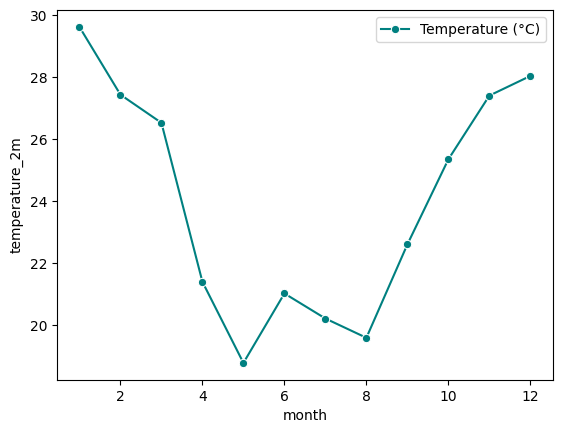

In [46]:
# plot to check average temperature across the months
balanced_df['date']=pd.to_datetime(balanced_df['date'])
balanced_df['month']=balanced_df['date'].dt.month
temp_seasonality_df=balanced_df.groupby('month').agg({'temperature_2m':'mean','precipitation':'mean','snowfall':'mean'}).reset_index().copy()
temp_seasonality_df
sns.lineplot(data=temp_seasonality_df, x='month', y='temperature_2m', marker='o', label='Temperature (°C)', color='teal')

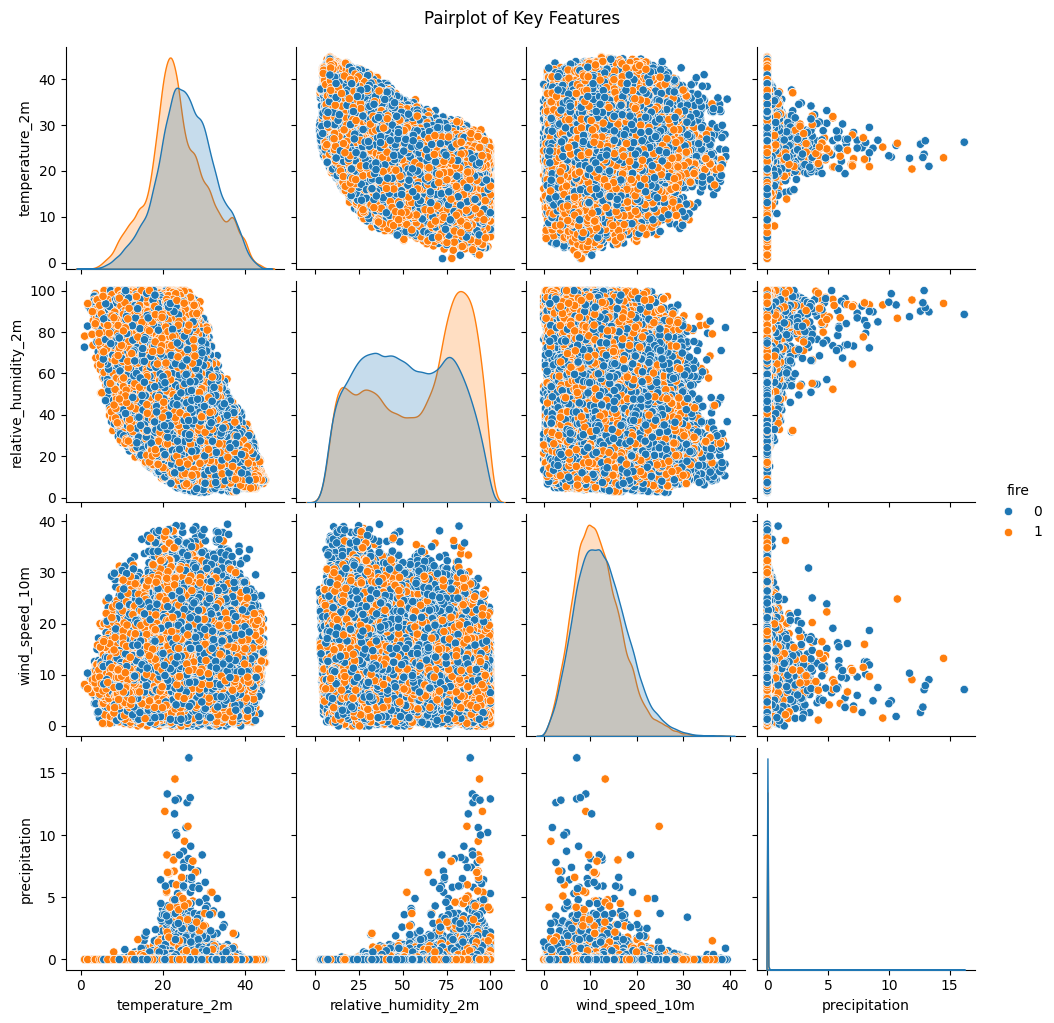

In [47]:
sns.pairplot(balanced_df,hue = 'fire', vars=['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation'])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

C:\Users\giris\AppData\Local\Temp\ipykernel_56960\2502893551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y=feature, data=balanced_df, palette=palette_colors)


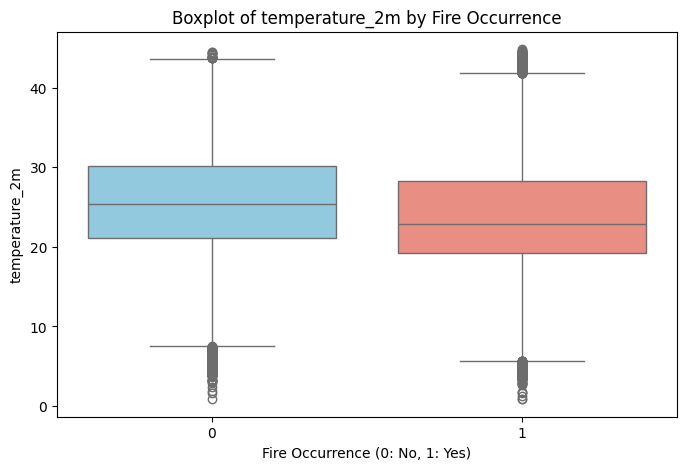

C:\Users\giris\AppData\Local\Temp\ipykernel_56960\2502893551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y=feature, data=balanced_df, palette=palette_colors)


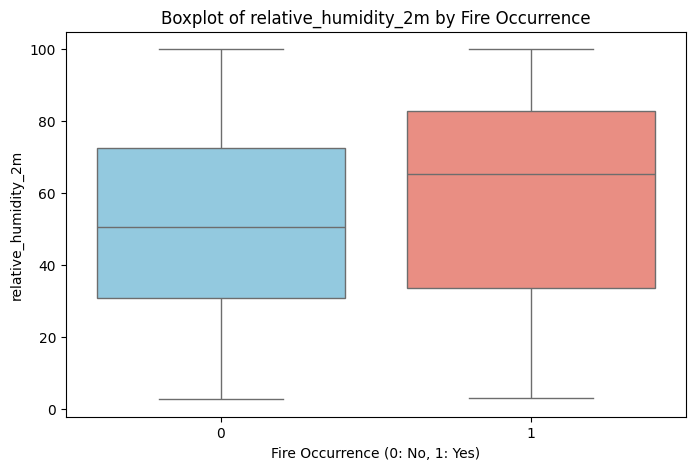

C:\Users\giris\AppData\Local\Temp\ipykernel_56960\2502893551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y=feature, data=balanced_df, palette=palette_colors)


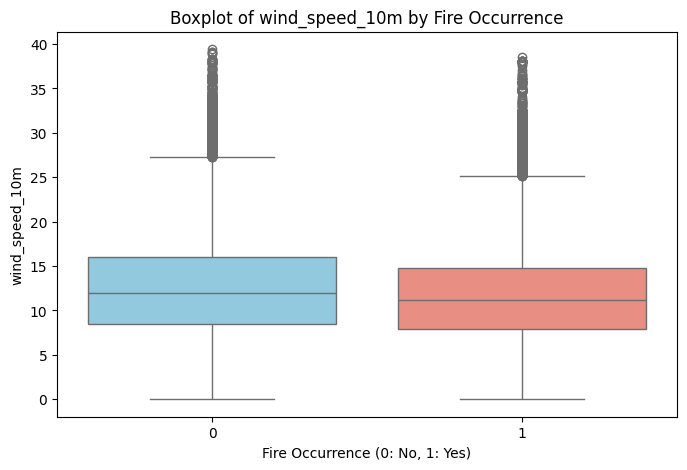

C:\Users\giris\AppData\Local\Temp\ipykernel_56960\2502893551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y=feature, data=balanced_df, palette=palette_colors)


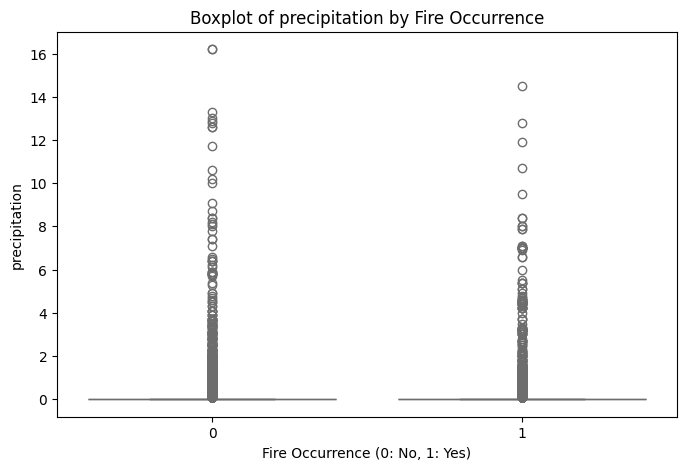

In [50]:
features_to_plot = ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation']

palette_colors = {'0': "skyblue", '1': "salmon"}

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='fire', y=feature, data=balanced_df, palette=palette_colors)
    plt.title(f'Boxplot of {feature} by Fire Occurrence')
    plt.xlabel('Fire Occurrence (0: No, 1: Yes)')
    plt.ylabel(feature)
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Weather and Fire Variables')

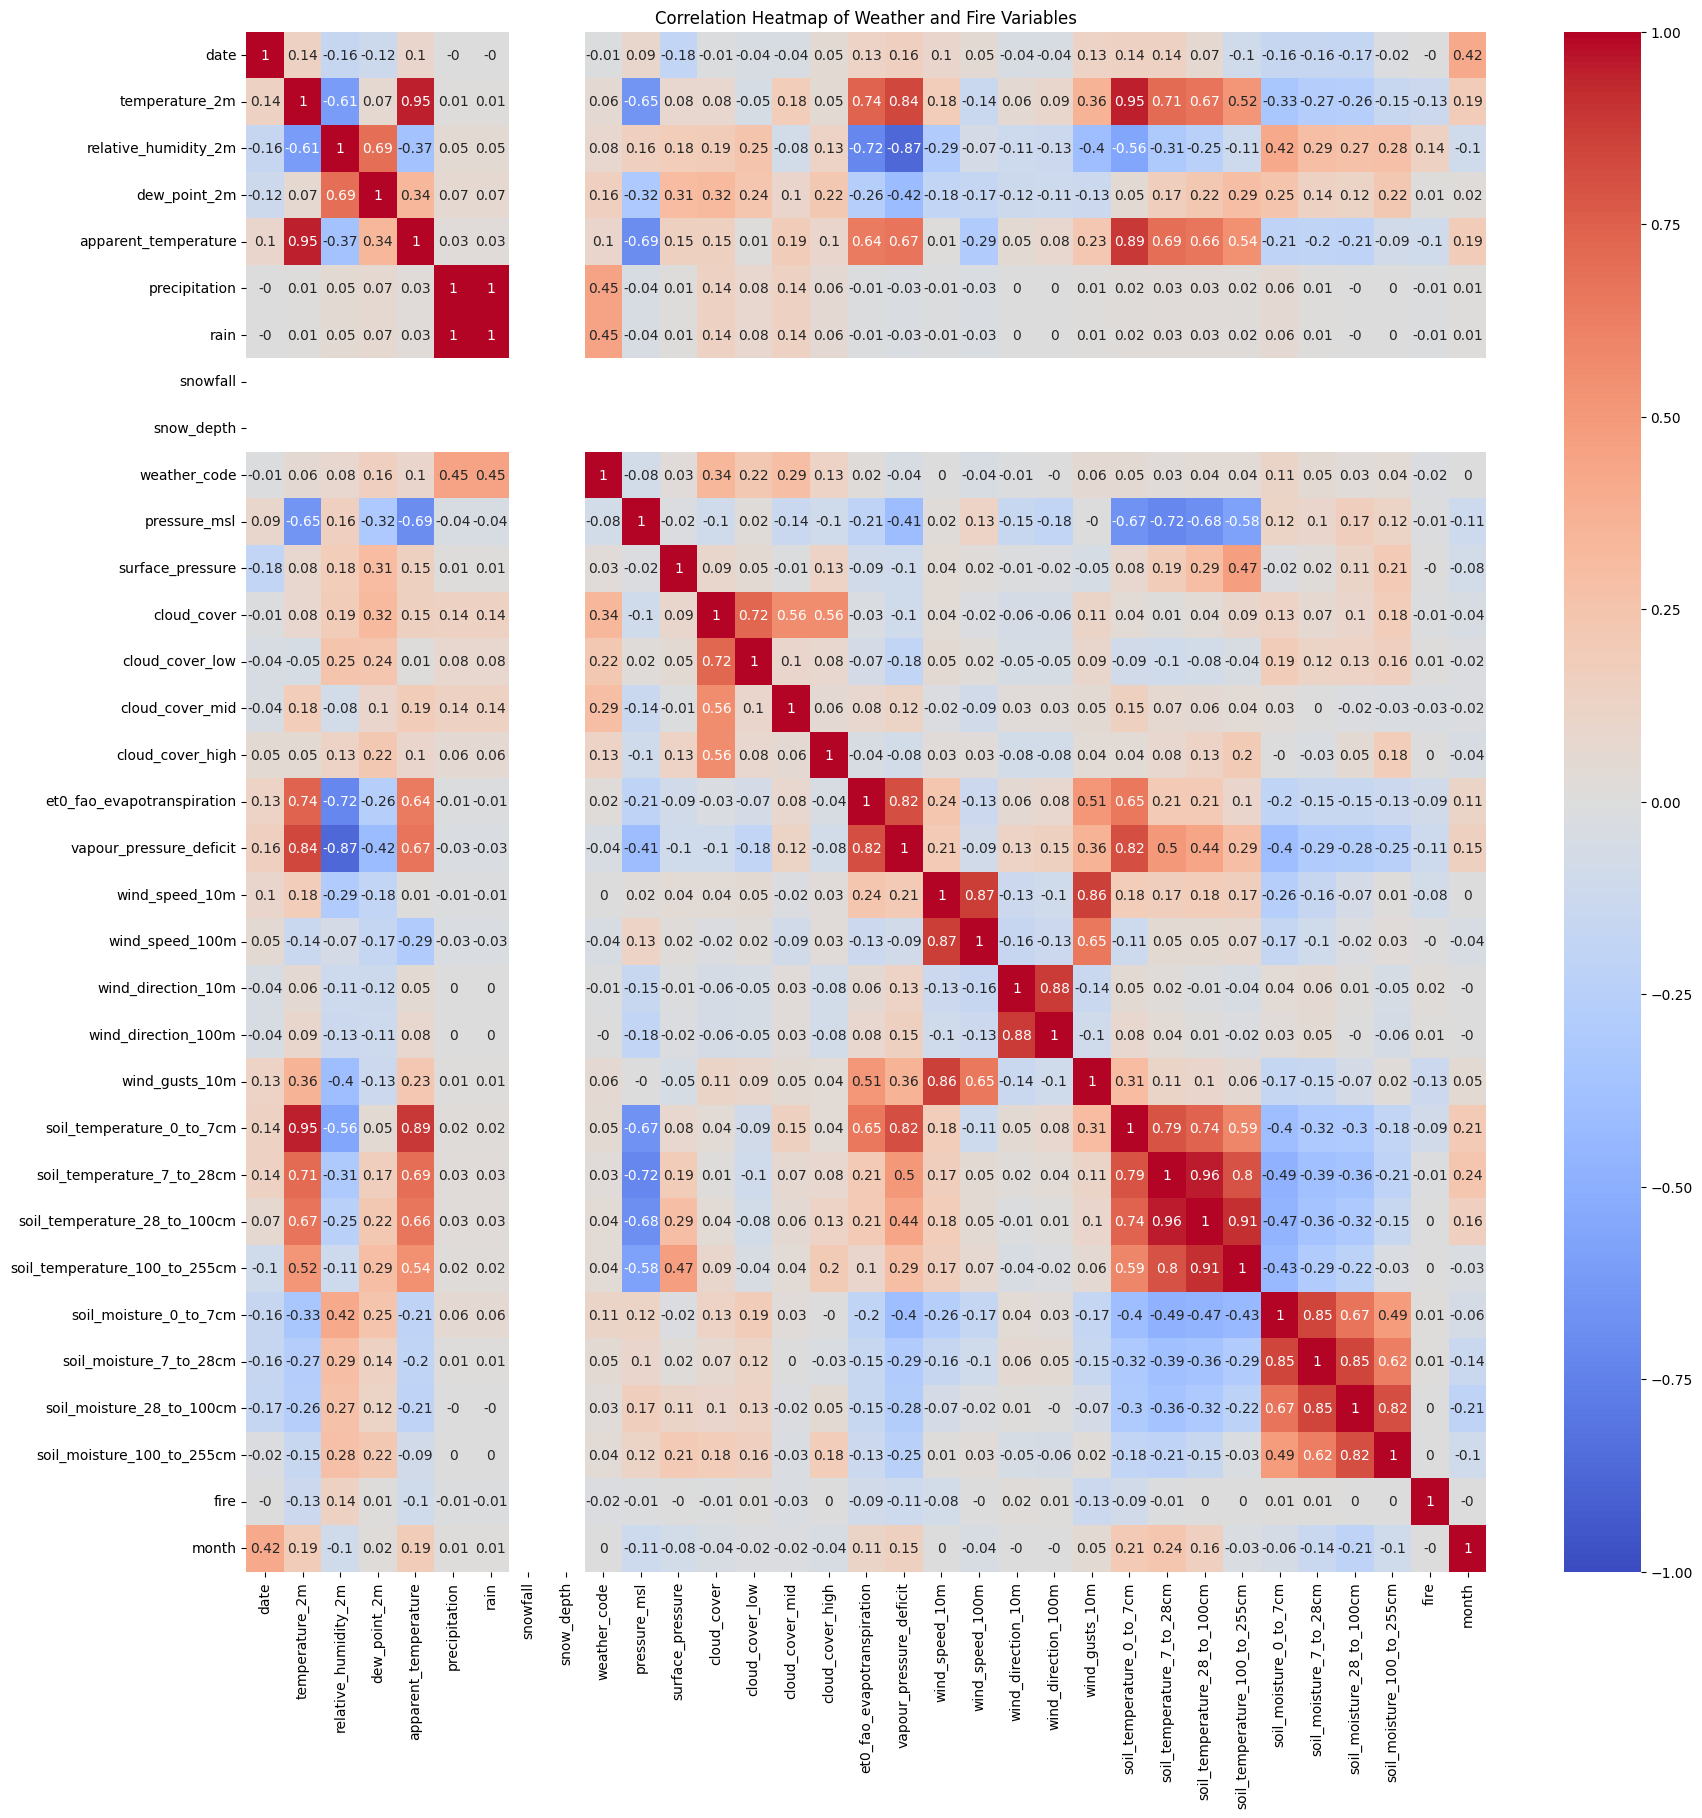

In [52]:
"""Heat map between all features"""
corr_matrix = balanced_df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Weather and Fire Variables')

In [53]:
balanced_df.to_csv('Datasets/training.csv', index=False)